# Inteligentná analýza údajov - časť Predspracovanie
## Dataset 82
#### Martin Budinský, Ivana Baleková <br/>
Podiel práce každého z dvojice: 50%

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

#### Nastavenie pandas

Takisto ako pri prieskumnej analýze si nastavíme pandas aby zobrazoval všetky stĺpce datasetu a tiež aby zobrazil celé hodnoty atribútov.

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

#### Načítanie datasetov

In [4]:
personal_train_data = pd.read_csv('datasets/personal_train.csv', index_col=0)

personal_train_data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05


In [5]:
other_train_data = pd.read_csv('datasets/other_train.csv', index_col=0)

other_train_data.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Edward Woodard,"9976 Perez Trail Apt. 273\r\nDavidport, NC 80553",Black,Never-married,Other_service,f,9.0,Not-in-family,-0.231075,134.6640625,0.0,0.002102,HS-grad,180283.0,0.0,49.792111,<=50K,"{'mean_oxygen':'6.162207358','std_oxygen':'27.43869012','kurtosis_oxygen':'5.1160153180000005','skewness_oxygen':'28.79016775'}",United-States,40.0,0.0,State-gov
1,Hassan Friedman,"7145 Aaron Village Apt. 294\r\nRoweville, DE 73399",White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.540982,113.0625,0.0,0.231768,Some-college,195891.0,0.0,42.812226,<=50K,"{'mean_oxygen':'1.731605351','std_oxygen':'11.76252074','kurtosis_oxygen':'11.96483676','skewness_oxygen':'203.0902438'}",United-States,45.0,0.0,Self-emp-not-inc
2,Edward Holt,Unit 8332 Box 5963\r\nDPO AA 41759,White,Married-civ-spouse,Craft-repair,f,9.0,Husband,12.393969,66.78125,0.0,2.623626,HS-grad,383493.0,1.0,32.658254,>50K,"{'mean_oxygen':'14.80852843','std_oxygen':'46.38263458','kurtosis_oxygen':'3.617249692','skewness_oxygen':'12.61488438'}",United-States,60.0,0.0,Self-emp-inc
3,Jose Miers,"38872 Burgess Neck Suite 666\r\nEmilyhaven, CT 68650",White,Married-civ-spouse,Sales,f,9.0,Wife,1.241507,111.4921875,0.0,0.417373,HS-grad,276218.0,0.0,37.794055,>50K,"{'mean_oxygen':'0.905518395','std_oxygen':'10.69109918','kurtosis_oxygen':'16.46840703','skewness_oxygen':'325.1141341'}",United-States,40.0,0.0,Private
4,Jay Wells,"063 Day Flats\r\nJudymouth, FL 61565",Black,Separated,Other-service,f,9.0,Not-in-family,-0.252255,\tnan,0.0,0.032944,HS-grad,73091.0,0.0,47.355369,<=50K,"{'mean_oxygen':'3.772575251','std_oxygen':'19.14934573','kurtosis_oxygen':'6.289634408','skewness_oxygen':'47.73565619'}",United-States,50.0,1876.0,Self-emp-not-inc


#### Spojenie datasetov

Takisto ako pri prieskumnej analýze si spojíme 2 datasety do jedného. Datasety spájame cez stĺpce name a address

In [6]:
train_data = personal_train_data.merge(other_train_data, on=['name', 'address'], how='outer')

train_data.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private


#### Transformácia stĺpca medical_info na 4 nové stĺpce

V prieskumnej analýze sme si všimli, že v dátach sa nachádza atribút medical_info, v ktorom sú ,,zabalené" 4 atribúty týkajúce sa hodnôt kyslíka v krvi pacienta. Ideme tento stĺpec teda transformovať na 4 nové stĺpce.

Ideme zistiť, či stĺpec medical_info obsahuje aj nejaké prázdne hodnoty.

In [7]:
train_data['medical_info'].isnull().sum()

9

Zistili sme, že v tomto stĺpci sa nachádza prázdna hodnota 9-krát.

Zobrazíme si záznamy s prázdnou hodnotou v tomto stĺpci

In [8]:
train_data[train_data['medical_info'].isnull()]

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
652,Oscar Brown,"8782 Holly Hill\r\nDanielview, WA 07092",45,Male,1974-08-31 00 00 00,Other,Never-married,Exec-managerial,NaN,10.0,Own-child,3.332666,NaN,0.0,1.188255,Some-college,NaN,1.0,41.188517,<=50K,NaN,Peru,24.0,0.0,Private
692,Joshua Perea,"346 Brian Stravenue Apt. 259\r\nNew Bethany, CO 67776",67,Male,1951-12-03,White,Never-married,Exec-managerial,f,9.0,Not-in-family,5.286094,70.2578125,0.0,1.753980,HS-grad,193689.0,1.0,41.918680,<=50K,NaN,NaN,65.0,0.0,Self-emp-not-inc
1227,Stephen Anderson,"8628 Morales Track Suite 662\r\nElizabethview, NC 92486",38,Male,1981-07-08,White,Never-married,Sales,NaN,10.0,Unmarried,0.340625,115.3359375,0.0,NaN,Some-college,NaN,0.0,45.238479,<=50K,NaN,United-States,40.0,0.0,Private
1519,Glen Edwards,"94418 Thomas Turnpike Suite 514\r\nNorth Eugene, AR 59529",43,Female,29/06/1976,Black,Never-married,?,t,10.0,NaN,2.713387,79.984375,NaN,1.049539,Some-college,317780.0,0.0,37.289196,<=50K,NaN,United-States,40.0,0.0,?
1697,John Ruffin,"03602 Daniels Villages Suite 661\r\nRayland, MO 34511",56,Male,1963-02-01,White,Never-married,Handlers-cleaners,f,9.0,Other-relative,-0.282879,126.8359375,0.0,-0.148753,HS-grad,81528.0,0.0,51.715384,<=50K,NaN,United-States,60.0,NaN,NaN
3043,George Trevino,"122 Antonio Cliff\r\nLewisview, NJ 68979",86,Female,1932/11/15,White,Married-civ-spouse,Prof-specialty,f,14.0,Wife,9.414610,30.8359375,0.0,3.119980,Masters,42972.0,1.0,48.742752,>50K,NaN,United-States,22.0,0.0,Private
3183,John Peno,"54278 Patterson Cliffs Apt. 914\r\nSandersfurt, GA 35863",61,Female,16/12/1957,White,Never-married,NaN,NaN,6.0,Own-child,0.080335,144.3515625,0.0,-0.287338,10th,36877.0,0.0,50.928502,<=50K,NaN,United-States,10.0,NaN,Private
3438,Wayne Pullen,"02705 Sheila Shoals Suite 800\r\nMichelleberg, KY 63437",47,Male,1972-01-31,White,Married-civ-spouse,Machine-op-inspct,f,9.0,NaN,0.403507,??\r\r\n,0.0,0.466374,HS-grad,NaN,0.0,49.284603,<=50K,NaN,United-States,40.0,0.0,Private
3487,Jesse Huether,"1063 Erin Fall Apt. 593\r\nAllentown, ID 88019",64,Female,1955-07-15,White,Divorced,Prof-specialty,f,16.0,Unmarried,-0.361904,118.1640625,25236.0,-0.055119,Doctorate,NaN,0.0,4873.457726,>50K,NaN,NaN,65.0,0.0,Private


Keďže nie je dobrým zvykom meniť dáta priamo v originálnom datasete, vytvoríme si nový dataset, ktorý obsahuje iba stĺpec medical_info. Práve v  tomto ,,pomocnom" datasete budeme robiť už vyššie spomínanú transformáciu.

In [9]:
medical_info_df = train_data[['medical_info']].dropna()

medical_info_df

,medical_info
0,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}"
1,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}"
2,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}"
3,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}"
4,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}"
...,...
3978,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}"
3979,"{'mean_oxygen':'18.72826087','std_oxygen':'47.50089495','kurtosis_oxygen':'3.116141164','skewness_oxygen':'9.737623197000001'}"
3980,"{'mean_oxygen':'1.7959866219999998','std_oxygen':'17.55064865','kurtosis_oxygen':'10.52891651','skewness_oxygen':'115.8816543'}"
3981,"{'mean_oxygen':'1.242474916','std_oxygen':'15.22643149','kurtosis_oxygen':'13.50540919','skewness_oxygen':'193.8022286'}"


Keďže sme odstránili záznamy s prázdnou hodnotou v stĺpci medical_info, náš pomocný dataset obsahuje 3974 záznamov. Indexy zostali zachované z pôvodného datasetu, keďže ako môžeme vidieť najvyšší index je 3982, napriek tomu že pomocný dataset obsahuje o 9 záznamov menej.

Ideme si napísať metódu, ktorá vytiahne zo stĺpca medical_info hodnoty 4 nových atribútov a upraví ich do vhodného formátu.

In [10]:
def process_medical_info_col(medical_info):
    medical_info = medical_info.strip("{}")
    cols = medical_info.split(",")
    values = [col.split(':')[1] for col in cols]
    stripped_values = [value.strip("'") for value in values]

    return pd.Series(stripped_values)

In [11]:
medical_info_df[['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = medical_info_df.medical_info.apply(process_medical_info_col)
medical_info_df.head()

,medical_info,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",9.899665552,37.31527479,4.086775553,16.784358800000003
2,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",3.258361204,22.6477159,8.108096424,70.22644286
3,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",0.644648829,10.91614342,20.50089209,449.2782643
4,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",1.191471572,9.935542807000001,16.58796639,371.4528926


Ako môžeme vidieť, transformácia stĺpca medical_info bola úspešná a podarilo sa nám vytvoriť 4 nové atribúty.

Teraz môžeme pripojiť pomocný dataset s novými stĺpcami k pôvodnému.

In [12]:
train_data = train_data.merge(medical_info_df, how='outer', left_index=True, right_index=True)

train_data

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info_x,native-country,hours-per-week,capital-loss,workclass,medical_info_y,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",9.899665552,37.31527479,4.086775553,16.784358800000003
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",3.258361204,22.6477159,8.108096424,70.22644286
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",0.644648829,10.91614342,20.50089209,449.2782643
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",1.191471572,9.935542807000001,16.58796639,371.4528926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",58,Female,1960/11/26,Asian-Pac-Islander,Never-married,Prof-specialty,f,14.0,Not-in-family,0.251673,NaN,0.0,0.099653,Masters,285102.0,0.0,45.488449,>50K,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}",Taiwan,40.0,0.0,Private,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}",1.997491639,18.64962525,10.59525135,118.2226386
3979,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,?,f,9.0,Husband,27.058807,35.3515625,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,"{'mean_oxygen':'18.72826087','std_oxygen':'47.500894

Vidíme, že v dátach nám ostali ešte pôvodné medical_info stĺpce. Ideme ich teda odstrániť, keďže ich už nepotrebujeme.

In [13]:
train_data.drop(['medical_info_x', 'medical_info_y'], axis=1, inplace=True)

train_data

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,India,40.0,0.0,Private,163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,United-States,35.0,0.0,Self-emp-not-inc,9.899665552,37.31527479,4.086775553,16.784358800000003
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,United-States,40.0,0.0,?,3.258361204,22.6477159,8.108096424,70.22644286
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,United-States,99.0,0.0,Private,0.644648829,10.91614342,20.50089209,449.2782643
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,United-States,20.0,0.0,Private,1.191471572,9.935542807000001,16.58796639,371.4528926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",58,Female,1960/11/26,Asian-Pac-Islander,Never-married,Prof-specialty,f,14.0,Not-in-family,0.251673,NaN,0.0,0.099653,Masters,285102.0,0.0,45.488449,>50K,Taiwan,40.0,0.0,Private,1.997491639,18.64962525,10.59525135,118.2226386
3979,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,?,f,9.0,Husband,27.058807,35.3515625,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,?,18.72826087,47.50089495,3.116141164,9.737623197000001
3980,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,67,Male,1952-04-11,White,Married-civ-spouse,Exec-managerial,f,16.0,Husband,1.807447,??,0.0,0.726491,Doctorate,50164.0,0.0,38.616453,>50K,United-States,60.0,0.0,Private,1.7959866219999998,17.55064865,10.52891651,115.8816543
3981,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",62,Male,1956-12-14,Black,Never-married,Farming-fishing,f,9.0,Own-child,0.613960,116.9765625,0.0,0.129173,HS-grad,124187.0,0.0,41.616828,<=50K,United-States,60.0,0.0,Private,1.242474916,15.22643149,13.50540919,193.8022286


Ideme si pozrieť informácie o upravenom datasete.

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Vidíme, že novovytvorené stĺpce sú typu object hoci ide o číselné hodnoty.

Ideme teda pretypovať nové stĺpce na float64.

In [15]:
train_data = train_data.astype({'mean_oxygen': 'float64', 'std_oxygen': 'float64', 'kurtosis_oxygen': 'float64',
                                'skewness_oxygen': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


#### Pretypovanie stĺpca mean_glucose - 1. pokus

V prieskumnej analýze sme spozorovali, že atribút mean_glucose je typu object, hoci tiež ide o numerický atribút.

Ideme teda skúsiť pretypovať tento atribút.

In [16]:
train_data = train_data.astype({'mean_glucose': 'float64'})

train_data.info()

ValueError: could not convert string to float: '??'

Vidíme, že pretypovanie momentálne nie je možné, keďže sa v stĺpci nachádza hodnota '??'. Zrejme ide o prázdnu hodnotu.

Zobrazíme si záznamy s hodnotou '??' v stĺpci mean_glucose.

In [17]:
train_data[train_data['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
15,Kurt Littlefield,"822 Wilson Meadow\r\nMitchellmouth, RI 05935",27,Male,1992-08-13,White,Married-civ-spouse,Tech-support,f,10.0,Husband,-0.296756,??,0.0,0.162241,Some-college,158746.0,0.0,51.980023,<=50K,United-States,40.0,0.0,Private,3.361204,20.593696,9.086200,92.082643
36,Elmer King,"29688 Lindsey Dale Suite 077\r\nNorth Cassandra, PA 31881",52,Male,1967-01-02,White,Married-civ-spouse,Sales,f,10.0,Husband,-0.400658,??,0.0,0.141863,Some-college,111675.0,0.0,51.695198,<=50K,United-States,43.0,0.0,Private,1.832776,17.559706,10.530075,117.131775
42,Stephen Genova,"512 Duffy Lakes\r\nAlexmouth, WY 86476",65,Male,1954-06-12,White,Never-married,Farming-fishing,f,10.0,Own-child,3.693909,??,0.0,1.348453,Some-college,164658.0,1.0,44.202718,<=50K,United-States,60.0,0.0,Self-emp-inc,11.954013,44.688970,3.864756,14.077335
64,Pedro Sayle,"8864 Taylor Shoal\r\nStevenhaven, WA 77253",39,Female,1980-05-23,White,Divorced,Other-service,f,9.0,Not-in-family,-0.143556,??,0.0,0.027845,HS-grad,80430.0,0.0,48.810477,<=50K,United-States,40.0,0.0,Private,1.697324,15.626665,11.050048,135.954574
92,Robert Killinger,"09437 Diana Ford Apt. 873\r\nDelgadoside, AK 71380",51,Male,1968-06-28,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,33.626620,??,0.0,5.727785,Bachelors,229651.0,1.0,-3271.276509,>50K,United-States,50.0,0.0,Local-gov,98.836120,70.274782,0.603461,-0.497939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,Todd Longie,"09050 Phillips Wells Apt. 538\r\nRileymouth, NV 46699",48,Male,71-08-01,White,Never-married,Craft-repair,f,14.0,Not-in-family,-0.503301,??,0.0,0.139425,Masters,204527.0,0.0,53.586151,>50K,United-States,50.0,0.0,Private,32.605351,54.603693,1.977399,4.032597
3881,Matthew Anderson,"0892 Rivera Plain Suite 387\r\nSouth Brooke, NH 56488",64,Female,1955/01/10,Black,Widowed,Other-service,f,9.0,Other-relative,-0.475104,??,0.0,-0.108507,HS-grad,217210.0,0.0,49.763125,<=50K,United-States,40.0,0.0,Self-emp-not-inc,3.980769,21.231141,6.989964,55.284893
3930,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,NaN,f,8.0,Husband,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,NaN,NaN,0.0,Private,1.535117,13.055885,12.880652,200.733856
3931,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,Craft-repair,NaN,8.0,NaN,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,NaN,40.0,0.0,Private,1.535117,13.055885,12.880652,200.733856


Až 124 záznamov obsahuje hodnotu '??' v stĺpci mean_glucose.

## Zjednotenie formátu prázdnych hodnôt

V prieskumnej analýze sme si všimli, že viacero atribútov obsahuje podobné ,,otáznikové" hodnoty. Ideme teda tento problém vyriešiť pre všetky atribúty, ktorých sa to týka.

Tiež sme si všimli že ,,otáznikové" ale aj niektoré hodnoty kategorických atribútov obsahujú nadbytočné whitespace znaky. Ideme teda pre istotu očistiť hodnoty všetkých atribútov typu object od takýchto nadbytočných znakov.

In [18]:
train_data_obj = train_data.select_dtypes(['object'])
train_data[train_data_obj.columns] = train_data_obj.apply(lambda x: x.str.strip())

train_data['occupation'].unique()

array(['Adm-clerical', 'Other-service', '?', 'Prof-specialty',
       'Transport-moving', 'Exec-managerial', nan, 'Sales',
       'Tech-support', 'Prof_specialty', 'Craft-repair',
       'Handlers-cleaners', 'Farming-fishing', 'Protective-serv',
       'Armed-Forces', 'Machine-op-inspct', 'Other_service',
       'Exec_managerial', 'Adm_clerical', 'Craft_repair',
       'Transport_moving', 'Machine_op_inspct', 'Protective_serv',
       'Farming_fishing', 'Handlers_cleaners', 'Tech_support',
       'Priv-house-serv', 'Priv_house_serv'], dtype=object)

Zdá sa že očistenie hodnôt prebehlo úspešne, keďže v stĺpci occupation sa pôvodne nachádzali hodnoty s medzerou na začiatku a teraz po týchto medzerách nie je ani stopy.

Ideme nahradiť ,,otáznikové" hodnoty NaN hodnotami.

In [19]:
train_data.replace(['?', '??'], np.nan, inplace=True)

In [20]:
train_data[train_data['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [21]:
train_data['workclass'].unique()

array(['Private', 'Self-emp-not-inc', nan, 'Local-gov', 'Self-emp-inc',
       'Federal-gov', 'State-gov', 'Without-pay'], dtype=object)

In [22]:
train_data['occupation'].unique()

array(['Adm-clerical', 'Other-service', nan, 'Prof-specialty',
       'Transport-moving', 'Exec-managerial', 'Sales', 'Tech-support',
       'Prof_specialty', 'Craft-repair', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Armed-Forces',
       'Machine-op-inspct', 'Other_service', 'Exec_managerial',
       'Adm_clerical', 'Craft_repair', 'Transport_moving',
       'Machine_op_inspct', 'Protective_serv', 'Farming_fishing',
       'Handlers_cleaners', 'Tech_support', 'Priv-house-serv',
       'Priv_house_serv'], dtype=object)

Vyzerá, že zjednotenie formátu prázdnych hodnôt prebehlo úspešne.

#### Pretypovanie mean_glucose - 2.pokus

In [23]:
train_data = train_data.astype({'mean_glucose': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3758 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3230 non-null   float64
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Teraz sa nám už podarilo pretypovať stĺpec mean_glucose.

## Zjednotenie formátu hodnôt jednotlivých atribútov

V prieskumnej analýze sme identifikovali, že v niektorých stĺpcoch sa nachádza viacero hodnôt reprezentujúcich to isté. Ideme teda zjednotiť formát týchto dát.

In [24]:
train_data['pregnant'].replace(['FALSE', 'f', 'F'], 0, inplace=True)
train_data['pregnant'].replace(['t', 'T', 'TRUE'], 1, inplace=True)

train_data['pregnant'].unique()

array([ 0.,  1., nan])

Hodnoty pravda/nepravda v stĺpci pregnant sme pretransformovali priamo na numerické hodnoty 0 a 1.

Tiež sme si všimli, že v stĺpci occupation sa nachádzajú duplicitné hodnoty - líšia sa jedine v tom že jedna reprezentácia používa ako oddeľovač pomlčku a druhá podtržník. Ideme teda nahradiť pomlčku podtržníkom a tým zjednotiť formát hodnôt.

In [25]:
train_data['occupation'] = train_data['occupation'].str.replace('-', '_')

train_data['occupation'].unique()

array(['Adm_clerical', 'Other_service', nan, 'Prof_specialty',
       'Transport_moving', 'Exec_managerial', 'Sales', 'Tech_support',
       'Craft_repair', 'Handlers_cleaners', 'Farming_fishing',
       'Protective_serv', 'Armed_Forces', 'Machine_op_inspct',
       'Priv_house_serv'], dtype=object)

Vyzerá, že zjednotenie formátu hodnôt kategorických atribútov prebehlo úspešne.

V prieskumnej analýze sme tiež zistili, že dátumy v stĺpci date_of_birth majú rôzne formáty. Tento stĺpec neplánujeme používať v modeli, ale zatiaľ tento stĺpec nebudeme odstraňovať, keďže nám môže pomôcť pri nahrádzaní prázdnych hodnôt v stĺpci age. Ideme teda upraviť formát dátumov, aby sa tento stĺpec dal pretypovať na datetime64.

V datasete sa nachádza niekoľko neštandartných dátumových formátov - napr. 1970-05-05 00 00 00 alebo 60-05-26. Ideme si teda napísať funkciu, ktorá prevedie tieto formáty na štandartné.

In [26]:
def process_date_of_birth_col(date_of_birth):
    if len(date_of_birth) == 8: # e.g 60-05-26
        if int(date_of_birth[:2]) >= 20:
            date_of_birth = "19" + date_of_birth
        else:
            date_of_birth = "20" + date_of_birth
            
    words = date_of_birth.split() # e.g 1970-05-05 00 00 00
    date = words[0]
    
    return pd.Series(date)

In [27]:
train_data[['date_of_birth']] = train_data.date_of_birth.apply(process_date_of_birth_col)

train_data = train_data.astype({'date_of_birth': 'datetime64'})
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3983 non-null   object        
 1   address           3983 non-null   object        
 2   age               3983 non-null   int64         
 3   sex               3983 non-null   object        
 4   date_of_birth     3983 non-null   datetime64[ns]
 5   race              3966 non-null   object        
 6   marital-status    3969 non-null   object        
 7   occupation        3758 non-null   object        
 8   pregnant          3970 non-null   float64       
 9   education-num     3968 non-null   float64       
 10  relationship      3972 non-null   object        
 11  skewness_glucose  3967 non-null   float64       
 12  mean_glucose      3230 non-null   float64       
 13  capital-gain      3971 non-null   float64       
 14  kurtosis_glucose  3968 n

Pretypovanie prebehlo úspešne, môžeme teda povedať, že transformácia dátumov sa podarila. 

Tiež sme si všimli, že by sa možno dal transformovať stĺpec address na niekoľko nových stĺpcov napr. mesto, ulica. Nemyslíme si však, že takéto atribúty by mohli napovedať, či daný pacient má alebo nemá cukrovku. Ak by ochorenie na cukrovku súviselo s nejakými geografickými faktormi, myslíme si, že by nám na takéto zistenie plne postačoval atribút native-country.

#### Premenovanie stĺpcov

V názvoch niektorých stĺpcov sa používa ako oddeľovač pomlčka a v iných zasa podtržník. Pri práci s datasetom je asi praktickejšie aby bol v názvoch použitý podtržník (vieme tak pristupovať k stĺpcom cez bodkovú notáciu). Ideme teda upraviť názvy stĺpcov.

In [28]:
train_data.columns = train_data.columns.str.replace("-", "_")

train_data.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital_status', 'occupation', 'pregnant', 'education_num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital_gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'class', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

Ak by sme chceli pristúpiť k cieľovém atribútu class cez bodkovú notáciu, nebolo by to možné, keďže class je tiež kľúčove slovo v jazyku Python. Preto teda premenujeme aj tento atribút na vhodnejší názov.

In [29]:
train_data = train_data.rename(columns={'class': 'diabetes'})

train_data.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital_status', 'occupation', 'pregnant', 'education_num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital_gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'diabetes', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

Vidíme, že sa nám podarilo úspešne premenovať stĺpce na vhodnejšie názvy.

## Deduplikácia záznamov

V prieskumnej analýze sme spozorovali, že niektoré záznamy sú opísané v dvoch riadkoch. Tieto dva riadky obsahovali pre niektoré atribúty rovnaké hodnoty a pre niektoré boli komplementárne - v jednom riadku sa nachádzala prázdna hodnota v ďalšom nie, a naopak. Môžeme to ilustrovať na tomto príklade.

In [30]:
train_data[train_data['name'] == 'Alfred Funk']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
3556,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,1976-09-23,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,NaN,34.382812,5013.0,5.820934,Bachelors,259510.0,1.0,28.039905,<=50K,United-States,30.0,0.0,NaN,52.805184,74.921696,1.308383,0.520162
3557,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,1976-09-23,NaN,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,40.238546,34.382812,NaN,5.820934,Bachelors,259510.0,NaN,28.039905,<=50K,United-States,30.0,NaN,Private,52.805184,74.921696,1.308383,0.520162


Ideme teda takéto dvojriadkové záznamy spojiť do jedného riadku. 

In [31]:
train_data = train_data.groupby(['name', 'address', 'age']).first().reset_index()

train_data

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",62,Male,1956-11-02,White,Never-married,Other_service,0.0,10.0,Own-child,1.282292,80.523438,0.0,1.390950,Some-college,141323.0,1.0,54.076185,<=50K,United-States,40.0,0.0,Private,66.311873,77.549955,0.870147,-0.478376
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS 59124",46,Male,1973-07-04,White,Married-civ-spouse,Prof_specialty,0.0,9.0,Husband,26.289988,52.687500,0.0,4.343929,HS-grad,287037.0,1.0,29.001280,<=50K,United-States,40.0,0.0,Self-emp-not-inc,61.021739,80.095947,0.978639,-0.426168
2,Aaron Gann,"59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996",64,Female,1955-10-01,White,Never-married,Adm_clerical,0.0,10.0,Not-in-family,15.159711,53.476562,3674.0,2.903626,Some-college,193090.0,1.0,32.228667,<=50K,United-States,40.0,0.0,Private,4.731605,27.308666,6.964347,51.551196
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095",42,Male,1977-09-27,Black,Divorced,Craft_repair,0.0,8.0,Other-relative,0.611916,112.476562,0.0,0.262821,12th,242552.0,0.0,-4372.945318,<=50K,United-States,35.0,0.0,Self-emp-not-inc,2.136288,13.809526,9.966755,129.896678
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176",83,Male,1936-02-23,White,Married-civ-spouse,Transport_moving,0.0,5.0,Husband,10.456418,60.695312,0.0,2.306701,9th,266043.0,1.0,3289.010076,<=50K,United-States,40.0,0.0,Private,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA 31316",65,Female,1954-10-05,White,Never-married,Sales,0.0,10.0,Own-child,0.682166,111.054688,0.0,0.326218,Some-college,197552.0,0.0,4237.542562,<=50K,United-States,35.0,0.0,Private,1.753344,18.236376,11.034005,125.782096
3929,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, MA 52118",65,Male,1954-06-16,White,Never-married,Handlers_cleaners,0.0,6.0,Not-in-family,20.296980,36.710938,0.0,4.363307,10th,452808.0,1.0,38.260242,<=50K,United-States,40.0,0.0,Private,107.212375,74.621195,0.115883,-0.819638
3930,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",81,Male,1938-03-16,White,Married-civ-spouse,Transport_moving,0.0,7.0,Husband,7.674092,58.125000,0.0,2.302345,11th,181705.0,1.0,38.232635,<=50K,United-States,40.0,0.0,Private,129.272575,78.381715,-0.407510,-0.853061
3931,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",63,Male,1956-03-19,White,Never-married,Adm_clerical,0.0,10.0,Own-child,0.488897,133.078125,0.0,0.042733,Some-college,217039.0,0.0,43.490051,<=50K,United-States,28.0,0.0,Private,2.276756,14.977893,9.120845,103.876871


In [32]:
train_data[train_data.duplicated(subset=['name', 'address', 'age'])]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [33]:
train_data[train_data['name'] == 'Alfred Funk']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
80,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,1976-09-23,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,40.238546,34.382812,5013.0,5.820934,Bachelors,259510.0,1.0,28.039905,<=50K,United-States,30.0,0.0,Private,52.805184,74.921696,1.308383,0.520162


Ako môžeme vidieť, deduplikácia záznamov sa nám podarila.

### Odstránenie stĺpca address

Keďže atribút address nepovažujeme v ďalšom procese za prínosný, rozhodli sme sa ho už teraz odstrániť z datasetu.

In [34]:
train_data.drop(columns='address', inplace=True)

train_data

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,62,Male,1956-11-02,White,Never-married,Other_service,0.0,10.0,Own-child,1.282292,80.523438,0.0,1.390950,Some-college,141323.0,1.0,54.076185,<=50K,United-States,40.0,0.0,Private,66.311873,77.549955,0.870147,-0.478376
1,Aaron Dini,46,Male,1973-07-04,White,Married-civ-spouse,Prof_specialty,0.0,9.0,Husband,26.289988,52.687500,0.0,4.343929,HS-grad,287037.0,1.0,29.001280,<=50K,United-States,40.0,0.0,Self-emp-not-inc,61.021739,80.095947,0.978639,-0.426168
2,Aaron Gann,64,Female,1955-10-01,White,Never-married,Adm_clerical,0.0,10.0,Not-in-family,15.159711,53.476562,3674.0,2.903626,Some-college,193090.0,1.0,32.228667,<=50K,United-States,40.0,0.0,Private,4.731605,27.308666,6.964347,51.551196
3,Aaron Gregg,42,Male,1977-09-27,Black,Divorced,Craft_repair,0.0,8.0,Other-relative,0.611916,112.476562,0.0,0.262821,12th,242552.0,0.0,-4372.945318,<=50K,United-States,35.0,0.0,Self-emp-not-inc,2.136288,13.809526,9.966755,129.896678
4,Aaron Lindley,83,Male,1936-02-23,White,Married-civ-spouse,Transport_moving,0.0,5.0,Husband,10.456418,60.695312,0.0,2.306701,9th,266043.0,1.0,3289.010076,<=50K,United-States,40.0,0.0,Private,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,65,Female,1954-10-05,White,Never-married,Sales,0.0,10.0,Own-child,0.682166,111.054688,0.0,0.326218,Some-college,197552.0,0.0,4237.542562,<=50K,United-States,35.0,0.0,Private,1.753344,18.236376,11.034005,125.782096
3929,Zachary Grandfield,65,Male,1954-06-16,White,Never-married,Handlers_cleaners,0.0,6.0,Not-in-family,20.296980,36.710938,0.0,4.363307,10th,452808.0,1.0,38.260242,<=50K,United-States,40.0,0.0,Private,107.212375,74.621195,0.115883,-0.819638
3930,Zachary Miller,81,Male,1938-03-16,White,Married-civ-spouse,Transport_moving,0.0,7.0,Husband,7.674092,58.125000,0.0,2.302345,11th,181705.0,1.0,38.232635,<=50K,United-States,40.0,0.0,Private,129.272575,78.381715,-0.407510,-0.853061
3931,Zachary Seltzer,63,Male,1956-03-19,White,Never-married,Adm_clerical,0.0,10.0,Own-child,0.488897,133.078125,0.0,0.042733,Some-college,217039.0,0.0,43.490051,<=50K,United-States,28.0,0.0,Private,2.276756,14.977893,9.120845,103.876871


## Nahradenie prázdnych hodnôt

Pre zopakovanie si necháme zobraziť počet prázdnych hodnôt v jednotlivých stĺpcoch

In [35]:
train_data.isnull().sum()

name                  0
age                   0
sex                   0
date_of_birth         0
race                  2
marital_status        2
occupation          210
pregnant              1
education_num         1
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             1
fnlwgt                0
diabetes              0
std_glucose           0
income                1
native_country       65
hours_per_week        1
capital_loss          2
workclass           209
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

Môžeme vidieť, že oproti prieskumnej analýze, sa nám počet prázdnych hodnôt zmenil. Je to spôsobené transformáciou ,,otáznikových" hodnôt na NaN hodnoty a tiež deduplikáciou záznamov.

In [36]:
train_data_copy = train_data.copy()

### Atribút sex

Ideme si zobraziť unikátne hodnoty atribútu sex

In [37]:
train_data_copy.sex.unique()

array(['Male', 'Female'], dtype=object)

V tomto stĺpci sa podľa očakávania nachádzajú iba 2 hodnoty.

Poďme sa pozrieť na početnosť hodnôt.

In [38]:
train_data_copy.sex.value_counts().idxmax()

'Male'

V datasete je viac záznamov o mužoch ako o ženách. Napíšeme si vlastný imputer, ktorý namiesto chýbajúcich hodnôt doplní modus (hodnotu 'Male') ale v prípade, že by v danom zázname bola hodnota atribútu pregnant rovná 1, doplní hodnotu 'Female'.

In [39]:
class SexImputer(TransformerMixin):
    def __init__(self):
        self.value = ''
        
    def _get_mask(self, X):
        return np.isnan(X.sex)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.value = X[~mask].sex.mode()
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        X.loc[mask, 'sex'] = X[mask].pregnant.apply(lambda x : self.value if x == 0 else 'Female')

        return X


### Atribút relationship

Zobrazíme si jedinečné hodnoty tohto atribútu.

In [40]:
train_data_copy.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Other-relative',
       'Unmarried', 'Wife'], dtype=object)

V trénovacom datasete sa síce prázdne hodnoty tohto atribútu nenachádzajú ale ak by sa náhodou nachádzali v testovacej sade prázdne hodnoty budeme nahradzovať modusom. 

### Atribút race

Zobrazíme si záznamy s prázdnymi hodnotami v tomto stĺpci a tiež si zobrazíme všetky unikátne hodnoty tohto atribútu

In [41]:
train_data_copy[train_data_copy['race'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1002,Edward Parker,54,Male,1965-05-09,NaN,Never-married,Craft_repair,0.0,9.0,Other-relative,0.289589,138.546875,0.0,-0.362068,HS-grad,324960.0,0.0,47.449457,<=50K,United-States,40.0,0.0,Private,2.667224,16.539341,8.920507,97.199171
1208,George Bermudez,30,Male,1989-06-02,NaN,Never-married,Farming_fishing,0.0,9.0,Not-in-family,0.423208,95.906250,0.0,0.287274,HS-grad,97261.0,0.0,-4640.909082,<=50K,United-States,40.0,0.0,Private,0.894649,10.494413,16.244146,324.853994


In [42]:
train_data_copy['race'].unique()

array(['White', 'Black', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', nan], dtype=object)

V tomto stĺpci vyskúšame nahradiť chýbajúce hodnoty modusom.

In [43]:
imp_race = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_race.fit(train_data_copy[['race']])
train_data_copy['race'] = imp_race.transform(train_data_copy[['race']])

train_data_copy[train_data_copy['race'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V stĺpci race sa už nenachádzajú prázdne hodnoty

### Atribút marital_status

Zobrazíme si záznamy, ktoré majú prázdne hodnoty v stĺpci marital_status.

In [44]:
train_data_copy[train_data_copy['marital_status'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2062,Joseph Russell,65,Male,1954-03-15,Black,NaN,Craft_repair,0.0,6.0,Not-in-family,-0.014803,112.062500,0.0,0.331625,10th,53930.0,1.0,48.149466,<=50K,NaN,40.0,0.0,Private,2.406355,17.225839,9.008724,93.280598
2919,Ray Gillum,35,Female,1984-08-27,White,NaN,NaN,0.0,9.0,Not-in-family,0.275451,145.890625,0.0,-0.302080,HS-grad,299090.0,0.0,46.322786,<=50K,United-States,30.0,0.0,NaN,1.198161,10.132238,16.112719,348.503577


Vidíme, že sa jedná o 2 záznamy - muž a žena. Zobrazíme si, aké rôzne hodnoty atribútu marital_status sa v datasete nachádzajú.

In [45]:
train_data_copy['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Widowed',
       'Married-AF-spouse', nan], dtype=object)

Keďže hodnoty nie sú numerické, nemôžeme chýbajúce hodnoty nahradiťi ich priemerom ani mediánom. 

Zistíme, ktorá hodnota sa vyskytuje najčastejšie.

In [46]:
train_data_copy['marital_status'].value_counts().idxmax()

'Married-civ-spouse'

In [47]:
train_data_copy['marital_status'].value_counts().max()

1817

Zistili sme, že najčastejšie sa vyskytuje hodnota "married_civ_spouse". V datasete sa nachádza 1817krát.

Situáciu si môžeme aj vizualizovať.

<AxesSubplot:>

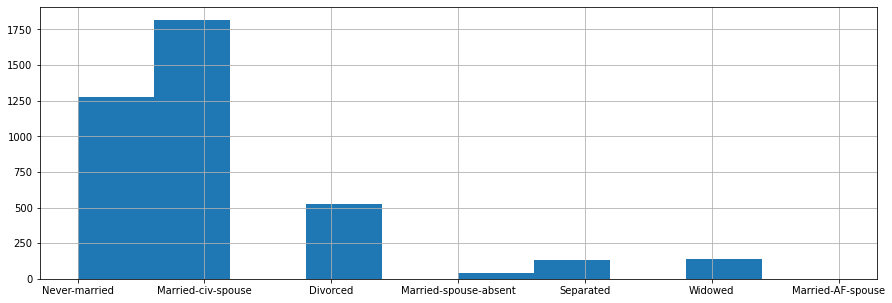

In [48]:
train_data_copy['marital_status'].hist(figsize = (15,5))

Chýbajúce hodnoty teda nahradíme, podobne ako v predchádzajúcom prípade, tou najfrekventovanejšou

In [49]:
imp_marital = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_marital.fit(train_data_copy[['marital_status']])
train_data_copy['marital_status'] = imp_marital.transform(train_data_copy[['marital_status']])

train_data_copy[train_data_copy['marital_status'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V stĺpci marital_status sa už nenachádzajú žiadne prázdne hodnoty.

### Atribút occupation

In [50]:
train_data_copy[train_data_copy['occupation'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
38,Alan Strope,33,Male,1986-01-25,White,Never-married,NaN,0.0,13.0,Not-in-family,0.051941,145.828125,0.0,-0.041406,Bachelors,317761.0,0.0,48.564730,<=50K,United-States,40.0,0.0,NaN,2.365385,19.796906,9.259338,90.480282
48,Albert Jensen,45,Female,1973-12-06,White,Widowed,NaN,0.0,9.0,Not-in-family,0.278985,NaN,0.0,-0.325547,HS-grad,152157.0,0.0,47.771388,<=50K,United-States,20.0,0.0,NaN,1.730769,12.886866,11.592261,172.894915
51,Albert Menefee,52,Male,1966-10-30,White,Married-civ-spouse,NaN,0.0,14.0,Husband,2.015417,98.359375,0.0,1.101357,Masters,172652.0,1.0,42.515941,<=50K,United-States,8.0,0.0,NaN,13.989130,48.571370,3.560791,11.610262
55,Alberto Martin,54,Female,1965-04-23,Black,Widowed,NaN,0.0,10.0,Unmarried,0.030169,140.437500,0.0,0.121573,Some-college,186061.0,0.0,46.453059,<=50K,United-States,40.0,4356.0,NaN,1.512542,13.934354,12.659416,182.183402
66,Alex Stubblefield,26,Female,1993-05-06,White,Married-civ-spouse,NaN,0.0,10.0,Wife,0.149781,NaN,0.0,-0.121819,Some-college,174163.0,0.0,48.260143,>50K,United-States,40.0,0.0,NaN,2.188963,13.848720,9.789625,127.965886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,William Phillips,49,Male,1969-12-27,White,Married-civ-spouse,NaN,0.0,13.0,Husband,0.617168,96.585938,0.0,0.583242,Bachelors,177351.0,0.0,46.868421,>50K,United-States,40.0,2174.0,NaN,4.163043,25.444464,6.723508,47.774505
3868,William Pope,58,Male,1961-07-28,White,Married-civ-spouse,NaN,0.0,9.0,Husband,27.058807,35.351562,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,NaN,18.728261,47.500895,3.116141,9.737623
3871,William Reasner,49,Male,1970-08-29,White,Married-civ-spouse,NaN,1.0,13.0,Husband,-0.018722,91.187500,0.0,0.778607,Bachelors,208311.0,0.0,58.170916,>50K,United-States,80.0,0.0,NaN,19.733278,50.996589,2.538335,5.381815
3893,William Trudnowski,64,Female,1955-09-23,White,Never-married,NaN,0.0,5.0,Own-child,39.912909,NaN,0.0,6.166521,9th,275778.0,1.0,30.465268,<=50K,Mexico,25.0,0.0,NaN,63.056856,68.151256,0.959817,0.093260


V našom datasete sa nachádza až 210 záznamov s prázdnou hodnotou v stĺpci occupation.

In [51]:
train_data_copy['occupation'].unique()

array(['Other_service', 'Prof_specialty', 'Adm_clerical', 'Craft_repair',
       'Transport_moving', 'Sales', 'Exec_managerial',
       'Handlers_cleaners', 'Machine_op_inspct', 'Tech_support', nan,
       'Farming_fishing', 'Protective_serv', 'Priv_house_serv',
       'Armed_Forces'], dtype=object)

Vidíme, že ani v tomto prípade nie sú hodnoty numerické. Tiež si ich nahradíme najfrekventovanejšou hodnotou.

In [52]:
imp_occupation = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_occupation.fit(train_data_copy[['occupation']])
train_data_copy['occupation'] = imp_occupation.transform(train_data_copy[['occupation']])

train_data_copy[train_data_copy['occupation'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V stĺpci marital_status sa už nenachádzajú žiadne prázdne hodnoty.

### Atribút pregnant

In [53]:
train_data_copy[train_data_copy['pregnant'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1890,John Peno,61,Female,1957-12-16,White,Never-married,Sales,NaN,6.0,Own-child,0.080335,144.351562,0.0,-0.287338,10th,36877.0,0.0,50.928502,<=50K,United-States,10.0,0.0,Private,0.629599,9.457037,20.37333,482.604319


Vidíme, že riadok s prázdnou hodnotou stĺpca "pregnant" je iba jeden. Stĺpec "sex" obsahuje hodnotu Female. Jedná sa teda o ženu 

Pozrieme sa aké rôzne hodnoty tento stĺpec obsahuje.

In [54]:
train_data_copy['pregnant'].unique()

array([ 0.,  1., nan])

Vidíme, že v tomto stĺpci sa okrem prázdnych hodnôt nachádzajú len 0 a 1. Keby zaznam, v ktorom hodnota chýba patril mužovi, hneď by sme identifikovali, že treba doplniť hodnotu "0". V našom prípade sa ale jedná o ženu. 

Pre istotu skontrolujeme ako to vyzerá s "tehotnými" mužmi v našom datasete.

In [55]:
train_data_copy.loc[(train_data_copy['sex'] == 'Male') & (train_data_copy['pregnant'] == 1)]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
507,Chris Vinson,59,Male,1960-10-03,White,Divorced,Craft_repair,1.0,10.0,Not-in-family,0.328759,134.945312,0.0,-0.054431,Some-college,106014.0,0.0,4843.654170,<=50K,United-States,60.0,0.0,Private,1.783445,11.992295,11.555695,189.492413
683,Daniel Price,47,Male,1972-04-01,White,Married-civ-spouse,Prof_specialty,1.0,13.0,Husband,2.058924,81.765625,0.0,0.649973,Bachelors,55291.0,0.0,38.722669,>50K,United-States,40.0,0.0,Private,2.682274,15.521677,8.576075,94.894378
1950,Johnny Massimino,53,Male,1966-06-12,White,Married-civ-spouse,Machine_op_inspct,1.0,10.0,Husband,-0.136854,NaN,0.0,0.460307,Some-college,88500.0,0.0,53.309591,>50K,United-States,44.0,0.0,Private,2.056020,12.942542,10.478861,152.837248
2715,Nicholas Chastain,51,Male,1968-02-09,Amer-Indian-Eskimo,Divorced,Sales,1.0,9.0,Not-in-family,-0.315000,99.679688,14084.0,0.369947,HS-grad,34335.0,0.0,51.607887,>50K,United-States,40.0,0.0,Private,1.244147,12.475082,13.065341,207.429189
2946,Reginald Johnson,44,Male,1975-07-23,White,Never-married,Other_service,1.0,9.0,Unmarried,0.525138,NaN,0.0,0.344266,HS-grad,315877.0,0.0,46.068409,<=50K,United-States,40.0,2001.0,Private,2.781773,16.343257,7.727255,75.950084
3304,Russell Gonzalez,61,Male,1958-06-09,White,Never-married,Other_service,1.0,6.0,Own-child,37.111179,15.796875,0.0,5.940644,10th,99161.0,1.0,30.801877,<=50K,United-States,8.0,0.0,Private,54.909699,63.337765,1.284396,1.033338
3871,William Reasner,49,Male,1970-08-29,White,Married-civ-spouse,Craft_repair,1.0,13.0,Husband,-0.018722,91.187500,0.0,0.778607,Bachelors,208311.0,0.0,58.170916,>50K,United-States,80.0,0.0,NaN,19.733278,50.996589,2.538335,5.381815


Našli 7 záznamov, kedy je muž tehotný. Tento stav teda napravíme.

In [56]:
train_data_copy.loc[(train_data_copy['sex'] == 'Male') & (train_data_copy['pregnant'] == 1), 'pregnant'] = 0

In [57]:
train_data_copy.loc[(train_data_copy['sex'] == 'Male') & (train_data_copy['pregnant'] == 1)]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Dataset už neobsahuje žiadnych mužov, ktorých atribút "pregnant" je 1

Teraz sa pozrieme, či máme viac žien tehotných alebo nie tehhotných.

<AxesSubplot:>

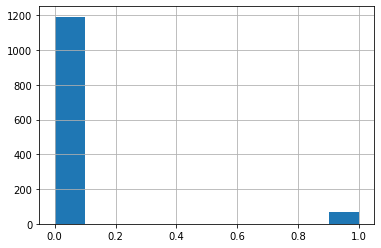

In [58]:
train_data_copy.loc[(train_data_copy['sex'] == 'Female'), 'pregnant'].hist()

Vidíme, že veľká väčšina žien nie je tehotných, a preto môžeme aj do chýbajúcich záznamov doplniť takúto hodnotu.

In [59]:
imp_pregnant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imp_pregnant.fit(train_data_copy[['pregnant']])
train_data_copy['pregnant'] = imp_pregnant.transform(train_data_copy[['pregnant']])

In [60]:
train_data_copy[train_data_copy['pregnant'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V datasete už nemáme záznamy, v ktorých by chýbali pregnant hodnoty.

### Artibúty Education_num a Education

Pozrieme si aké jedinečné hodnoty sa nachádzajú v stĺpci education_num.

In [61]:
train_data_copy['education_num'].unique()

array([10.,  9.,  8.,  5., 14., 13.,  7.,  3.,  6., 11., 12., 15.,  4.,
       16.,  2.,  1., nan])

In [62]:
len(train_data_copy['education_num'].unique())

17

V datasete sa nachádza ešte stĺpec education. Poďme sa pozrieť na jeho unikátne hodnoty.

In [63]:
train_data_copy['education'].unique()

array(['Some-college', 'HS-grad', '12th', '9th', 'Masters', 'Bachelors',
       '11th', '5th-6th', '10th', 'Assoc-voc', 'Assoc-acdm',
       'Prof-school', '7th-8th', 'Doctorate', '1st-4th', 'Preschool', nan],
      dtype=object)

In [64]:
len(train_data_copy['education'].unique())

17

Vidíme, že počet jedinečných hodnôt je v obodvoch stĺpcoch rovnaký. Zrejme medzi týmito dvomi atribútmi existuje nejaka súvislosť. Myslíme si, že atribút education_num je iba numerická reprezentácia kategorických hodnôt stĺpca education. Poďme si to overiť. 

In [65]:
for education_num in train_data_copy.education_num.unique():
    print(train_data_copy[train_data_copy.education_num == education_num].education.unique())

['Some-college']
['HS-grad' nan]
['12th']
['9th']
['Masters']
['Bachelors']
['11th']
['5th-6th']
['10th']
['Assoc-voc']
['Assoc-acdm']
['Prof-school']
['7th-8th']
['Doctorate']
['1st-4th']
['Preschool']
[]


Pre každú hodnotu education_num sme si vypísali jedinečné hodnoty education, ktoré sa v datasete spolu s ňou vyskytujú. Ako môžeme vidieť pre každú hodnotu education_num zodpovedá práve jedna hodnota atribútu education. Stĺpec education teda dstránime ale najskôr ho použijeme na nahradenie chýbajúcich hodnôt v stĺpci education_num.

In [66]:
train_data_copy[train_data_copy['education_num'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2929,Raymond Diaz,38,Female,1981-07-07,White,Separated,Sales,0.0,NaN,Unmarried,NaN,121.257812,0.0,0.010873,10th,405177.0,0.0,53.571396,<=50K,United-States,40.0,0.0,Private,2.040134,12.948253,11.198396,167.728186


In [67]:
train_data_copy[train_data_copy['education'] == '10th'].education_num.unique()

array([ 6., nan])

Vidíme, že aj táto hodnota chýba len v 1 zázname.

Napíšeme si vlastný imputer. Prázdne hodnoty v education_num bude nahrádzať podľa hodnoty v stĺpci education. Ak by sa aj v tomto stĺpci nachádzala prázdna hodnota, na nahradenie použijeme modus.

In [68]:
class EducationImputer(TransformerMixin):
    def __init__(self):
        self.mode = 0
    
    def create_dict(self, X):
        edu_dict = {}
        for education_num in X.education_num.unique():
            if pd.isnull(education_num):
                continue
                
            education = X[X.education_num == education_num].education.unique()[0]
            edu_dict[education] = education_num
            
        return edu_dict
        
    def _get_mask(self, X):
        return np.isnan(X.education_num)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.mode =  X[~mask].education_num.mode()
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        edu_dict = self.create_dict(X)
        
        X.loc[mask, 'education_num'] = X[mask].education.apply(lambda x : edu_dict[x] if not pd.isnull(x) else self.mode)

        return X


In [69]:
imp_edu = EducationImputer()
imp_edu.fit(train_data_copy)
train_data_copy = imp_edu.transform(train_data_copy)

In [70]:
train_data_copy[train_data_copy['education'] == '10th'].education_num.unique()

array([6.])

Namiesto prázdnej hodnoty sa doplnila správna hodnota podľa stĺpca education.

In [71]:
train_data_copy[train_data_copy['education_num'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Nahradenie pomocou nášho imputera sa podarilo.

### Atribút income

In [72]:
train_data_copy[train_data_copy['income'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1231,George Smith,59,Male,1960-04-07,White,Married-civ-spouse,Craft_repair,0.0,13.0,Husband,1.634902,88.546875,0.0,0.940484,Bachelors,210991.0,1.0,44.682361,NaN,United-States,40.0,1740.0,Local-gov,13.641304,44.57924,3.408574,10.783359


Aj táto hodnota chýba iba v jednom zázname.

In [73]:
train_data_copy['income'].unique()

array(['<=50K', '>50K', nan], dtype=object)

Vidíme, že ostatné záznamy obsahujú len dve rôzne hodnoty tohto atribútu (<=50K a >50K).

Zistíme, ktorá z týchto dvoch hodnôt sa vyskytuje častejšie. 

In [74]:
train_data_copy['income'].value_counts().idxmax()

'<=50K'

In [75]:
train_data_copy['income'].value_counts().max()

3007

In [76]:
train_data_copy['income'].count()

3932

Vidíme, že viac ako tri štvrtiny záznamov obsahuje hodnotu <=50K. Chýbajúcu hodnotu teda nehradíme touto.

In [77]:
imp_income = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_income.fit(train_data_copy[['income']])
train_data_copy['income'] = imp_income.transform(train_data_copy[['income']])

In [78]:
train_data_copy['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [79]:
train_data_copy[train_data_copy['income'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Doplnili sme chýbajúcu hodnotu.

### Atribút native_country

In [80]:
train_data_copy[train_data_copy['native_country'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
18,Adam Chipman,73,Female,1946-09-27,Black,Separated,Craft_repair,0.0,6.0,Unmarried,55.405757,11.882812,0.0,7.347117,10th,39223.0,1.0,28.277260,<=50K,NaN,40.0,0.0,Private,92.307692,67.402008,0.536685,-0.245253
112,Andre Mcdonald,45,Male,1973-12-16,Asian-Pac-Islander,Never-married,Transport_moving,0.0,9.0,Other-relative,-0.024402,NaN,0.0,-0.194928,HS-grad,163392.0,0.0,45.973317,<=50K,NaN,40.0,0.0,Private,15.123746,42.678875,2.850335,7.485031
196,Arthur Stallcup,53,Male,1966-05-16,White,Divorced,Other_service,0.0,13.0,Not-in-family,-0.282325,NaN,0.0,-0.125018,Bachelors,182655.0,0.0,49.459826,>50K,NaN,45.0,0.0,Private,3.158027,17.606036,7.390657,67.415886
298,Brent Leffert,41,Male,1978-04-22,White,Married-civ-spouse,Sales,0.0,13.0,Husband,2.079829,81.539062,0.0,0.860457,Bachelors,311184.0,0.0,38.689045,<=50K,NaN,20.0,0.0,Private,2.158027,19.927568,10.076770,104.745161
454,Charles Hicks,34,Male,1985-04-30,White,Married-civ-spouse,Exec_managerial,0.0,13.0,Husband,-0.639522,113.132812,0.0,0.097123,Bachelors,165695.0,0.0,56.996213,>50K,NaN,40.0,0.0,Private,5.027592,25.016451,6.142165,41.664378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Thomas Sobus,86,Male,1932-12-10,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,13.629142,52.109375,0.0,3.179048,Bachelors,239303.0,1.0,38.677803,<=50K,NaN,50.0,0.0,Private,4.081104,25.045129,7.126208,54.323798
3590,Tim Evans,56,Female,1963-07-23,Black,Never-married,Priv_house_serv,0.0,9.0,Unmarried,-0.145024,130.257812,0.0,0.101426,HS-grad,189674.0,0.0,49.040361,<=50K,NaN,28.0,0.0,Private,1.810201,14.178683,11.139956,150.876131
3672,Travis Gordon,62,Female,1957-04-09,White,Divorced,Tech_support,0.0,13.0,Not-in-family,-0.356742,NaN,0.0,-0.080479,Bachelors,163322.0,0.0,50.254681,<=50K,NaN,30.0,0.0,Private,3.224916,23.002445,7.610711,59.568055
3702,Vern Kneser,60,Male,1959-10-24,White,Married-civ-spouse,Prof_specialty,0.0,14.0,Husband,0.104573,122.351562,0.0,0.195328,Masters,325538.0,0.0,4475.411815,>50K,NaN,40.0,0.0,Federal-gov,3.342809,17.729561,7.020929,61.914650


Chýbajúca hodnota sa nachádza v 65 záznamoch.

In [81]:
train_data_copy['native_country'].unique()

array(['United-States', 'Columbia', 'El-Salvador', nan, 'Mexico',
       'Scotland', 'Puerto-Rico', 'China', 'Cuba', 'Germany', 'Thailand',
       'Italy', 'Trinadad&Tobago', 'Guatemala', 'Philippines',
       'Nicaragua', 'France', 'Jamaica', 'Vietnam', 'Taiwan', 'Poland',
       'India', 'South', 'Ecuador', 'England', 'Canada', 'Honduras',
       'Iran', 'Dominican-Republic', 'Portugal', 'Hungary', 'Greece',
       'Peru', 'Cambodia', 'Haiti', 'Hong', 'Ireland', 'Japan',
       'Yugoslavia'], dtype=object)

V tomto stĺpci sa nachádza pomerne veľa hodnôt. Vyskúšame vytvoriť novú hodnotu ,,Unknown", ktorou budeme nahrádzať prázdne hodnoty.

In [82]:
imp_native_country = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="Unknown")
imp_native_country.fit(train_data_copy[['native_country']])
train_data_copy['native_country'] = imp_native_country.transform(train_data_copy[['native_country']])

In [84]:
train_data_copy[train_data_copy['native_country'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [85]:
train_data_copy['native_country'].unique()

array(['United-States', 'Columbia', 'El-Salvador', 'Unknown', 'Mexico',
       'Scotland', 'Puerto-Rico', 'China', 'Cuba', 'Germany', 'Thailand',
       'Italy', 'Trinadad&Tobago', 'Guatemala', 'Philippines',
       'Nicaragua', 'France', 'Jamaica', 'Vietnam', 'Taiwan', 'Poland',
       'India', 'South', 'Ecuador', 'England', 'Canada', 'Honduras',
       'Iran', 'Dominican-Republic', 'Portugal', 'Hungary', 'Greece',
       'Peru', 'Cambodia', 'Haiti', 'Hong', 'Ireland', 'Japan',
       'Yugoslavia'], dtype=object)

Vidíme, že nám naozaj pribudla nová hodnota.

### Atribút hours_per_week

In [86]:
train_data_copy[train_data_copy['hours_per_week'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1310,Gregory Wagnon,52,Male,1967-03-10,White,Divorced,Handlers_cleaners,0.0,10.0,Own-child,6.119066,66.875,0.0,1.878734,Some-college,245053.0,1.0,42.182639,<=50K,United-States,NaN,1504.0,Private,3.695652,25.496003,7.2966,53.945293


In [87]:
train_data_copy['hours_per_week'].unique()

array([40., 35., 16., 25., 60., 55., 30., 50., 46., 42.,  2., 99., 64.,
       70., 59., 45., 20., 48.,  8., 52., 44., 65., 37., 14., 15., 43.,
       38., 68., 12., 17., 72., 23., 61., 18., 24., 75., 41., 10.,  6.,
       32., 51., 58., 36., 39., 56.,  5.,  4.,  3., 33., 27.,  9.,  7.,
       80., 47., 90., 84., 85.,  1., 54., 28., 66., 22., 19., 73., nan,
       53., 49., 77., 21., 34., 29., 63., 62., 13., 76., 11., 31., 26.,
       81., 57., 91.])

Doplniť treba iba hodnotu len v jednom zázname. Zistíme počet najčastejšie vyskytujúcej sa hodnoty a chýbajúcu hodnotu nahradíme tou.

In [88]:
train_data_copy['hours_per_week'].value_counts().idxmax()

40.0

In [89]:
imp_hours_per_week = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_hours_per_week.fit(train_data_copy[['hours_per_week']])
train_data_copy['hours_per_week'] = imp_hours_per_week.transform(train_data_copy[['hours_per_week']])

In [90]:
train_data_copy[train_data_copy['hours_per_week'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Chýbajúca hodnota bola doplnená.

### Atribút capital_loss

In [91]:
train_data_copy[train_data_copy['capital_loss'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1908,John Ruffin,56,Male,1963-02-01,White,Never-married,Handlers_cleaners,0.0,9.0,Other-relative,-0.282879,126.835938,0.0,-0.148753,HS-grad,81528.0,0.0,51.715384,<=50K,United-States,60.0,NaN,Private,4.728261,26.269072,6.965948,51.384494
2524,Melvin Ferullo,70,Male,1949-04-15,White,Married-civ-spouse,Craft_repair,0.0,6.0,Husband,0.348210,NaN,5013.0,0.299127,10th,40641.0,0.0,45.600496,<=50K,United-States,40.0,NaN,Local-gov,6.464047,27.964673,5.023047,27.075541


In [92]:
train_data_copy['capital_loss'].unique()

array([   0., 1902., 4356., 1590., 1887., 2001., 1848.,  880., 1977.,
       3770., 1564., 1408., 1602., 1980., 1485., 1974., 2392., 1573.,
       2002., 2559., 1672., 1740.,  625., 1504., 2547., 2415., 2258.,
       2444., 1876., 2339., 2149., 1594., 2603., 1669.,   nan, 1825.,
       2231., 1721., 1762., 2206., 1719., 1816., 2051., 1651., 1741.,
       2174., 2042., 1411., 1735., 2824.,  810., 1258., 1617., 1579.])

In [93]:
train_data_copy['capital_loss'].value_counts().idxmax()

0.0

In [94]:
train_data_copy['capital_loss'].value_counts().max()

3747

In [95]:
train_data_copy['capital_loss'].count()

3931

Vidíme, že najčastejšia hodnota je 0. Až 95% záznamov obsahuje hodnotu "0" v stĺpci capital_loss. Preto  nulu doplníme aj namiesto chýnajúcich hodnôt.

In [96]:
imp_capital_loss = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_capital_loss.fit(train_data_copy[['capital_loss']])
train_data_copy['capital_loss'] = imp_capital_loss.transform(train_data_copy[['capital_loss']])

In [97]:
train_data_copy['capital_loss'].value_counts().max()

3749

Počet záznamov s hodnotou 0 v atribúte capital_loss stúpol o 2 - správne sme doplnili chýbajúce hodnoty.

### Atribút workclass

In [98]:
train_data_copy[train_data_copy['workclass'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
38,Alan Strope,33,Male,1986-01-25,White,Never-married,Craft_repair,0.0,13.0,Not-in-family,0.051941,145.828125,0.0,-0.041406,Bachelors,317761.0,0.0,48.564730,<=50K,United-States,40.0,0.0,NaN,2.365385,19.796906,9.259338,90.480282
48,Albert Jensen,45,Female,1973-12-06,White,Widowed,Craft_repair,0.0,9.0,Not-in-family,0.278985,NaN,0.0,-0.325547,HS-grad,152157.0,0.0,47.771388,<=50K,United-States,20.0,0.0,NaN,1.730769,12.886866,11.592261,172.894915
51,Albert Menefee,52,Male,1966-10-30,White,Married-civ-spouse,Craft_repair,0.0,14.0,Husband,2.015417,98.359375,0.0,1.101357,Masters,172652.0,1.0,42.515941,<=50K,United-States,8.0,0.0,NaN,13.989130,48.571370,3.560791,11.610262
55,Alberto Martin,54,Female,1965-04-23,Black,Widowed,Craft_repair,0.0,10.0,Unmarried,0.030169,140.437500,0.0,0.121573,Some-college,186061.0,0.0,46.453059,<=50K,United-States,40.0,4356.0,NaN,1.512542,13.934354,12.659416,182.183402
66,Alex Stubblefield,26,Female,1993-05-06,White,Married-civ-spouse,Craft_repair,0.0,10.0,Wife,0.149781,NaN,0.0,-0.121819,Some-college,174163.0,0.0,48.260143,>50K,United-States,40.0,0.0,NaN,2.188963,13.848720,9.789625,127.965886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,William Phillips,49,Male,1969-12-27,White,Married-civ-spouse,Craft_repair,0.0,13.0,Husband,0.617168,96.585938,0.0,0.583242,Bachelors,177351.0,0.0,46.868421,>50K,United-States,40.0,2174.0,NaN,4.163043,25.444464,6.723508,47.774505
3868,William Pope,58,Male,1961-07-28,White,Married-civ-spouse,Craft_repair,0.0,9.0,Husband,27.058807,35.351562,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,NaN,18.728261,47.500895,3.116141,9.737623
3871,William Reasner,49,Male,1970-08-29,White,Married-civ-spouse,Craft_repair,0.0,13.0,Husband,-0.018722,91.187500,0.0,0.778607,Bachelors,208311.0,0.0,58.170916,>50K,United-States,80.0,0.0,NaN,19.733278,50.996589,2.538335,5.381815
3893,William Trudnowski,64,Female,1955-09-23,White,Never-married,Craft_repair,0.0,5.0,Own-child,39.912909,NaN,0.0,6.166521,9th,275778.0,1.0,30.465268,<=50K,Mexico,25.0,0.0,NaN,63.056856,68.151256,0.959817,0.093260


In [99]:
train_data_copy['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', nan, 'Federal-gov', 'Without-pay'], dtype=object)

In [100]:
train_data_copy['workclass'].value_counts().idxmax()

'Private'

In [101]:
train_data_copy['workclass'].value_counts().max()

2770

In [102]:
train_data_copy['workclass'].count()

3724

Chýbajúce hodnoty sa nachádzajú až v 209 záznamoch. Skúsme overiť, či je atrinút workclass závislý na pohlaví, veku alebo vzdelaní. 

Na to, aby sme zistili závislosti, musíme najprv pretransformovať atribúty do numerickej podoby.

In [103]:
#TODO - pretransformovať dáta na čísla a doplniť chýbajúce hodnoty

### Artibút age

V stĺpci age sa v trénovacej množine dát nenachádzajú prázdne hodnoty avšak v testovacej sade sa môžu vyskytnúť záznamy bez uvedeného veku. Preto sme si pre istotu vytvorili vlastný AgeImputer, ktorý vypočíta vek podľa dátumu narodenia. Ak by sa náhodou nachádzala prázdna hodnota aj v stĺpci date_of_birth, doplníme namiesto prázdnej hodnoty medián.

In [104]:
from sklearn.base import TransformerMixin

class AgeImputer(TransformerMixin):
    def __init__(self):
        self.base_year = 2019
        self.median = 0
    
    def _get_mask(self, X):
        return np.isnan(X.age)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.median = int(np.median(X[~mask].age))
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        X.loc[mask, 'age'] = X[mask].date_of_birth.apply(lambda x : (self.base_year - x.year) if not pd.isnull(x) else self.median)
        
        return X
        

<AxesSubplot:>

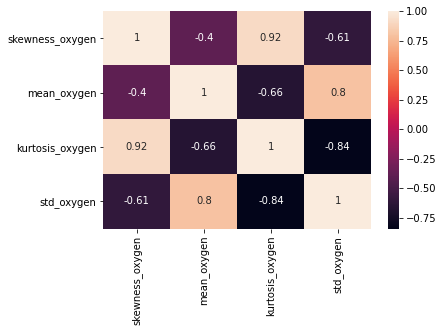

In [105]:
sns.heatmap(train_data_copy.loc[:, ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].corr(), annot=True)

### Artibút mean_glucose

In [106]:
train_data_copy.isnull().sum()

name                  0
age                   0
sex                   0
date_of_birth         0
race                  0
marital_status        0
occupation            0
pregnant              0
education_num         0
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             1
fnlwgt                0
diabetes              0
std_glucose           0
income                0
native_country        0
hours_per_week        0
capital_loss          0
workclass           209
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

Teraz chceme preskúmať, aká stratégia dopĺňania by bola najlepšia pre ,,glucose" atribúty. Myslíme si, aj na základe prieskumnej analýzy, že tieto atribúty, budú mať veľkú dôležitosť pri predikovaní cieľovej premennej. Preto teda chceme hodnoty týchto atribútov nahrádzať sofistikovanejším spôsobom.

Pozrime si korelačnú mapu týchto atribútov

<AxesSubplot:>

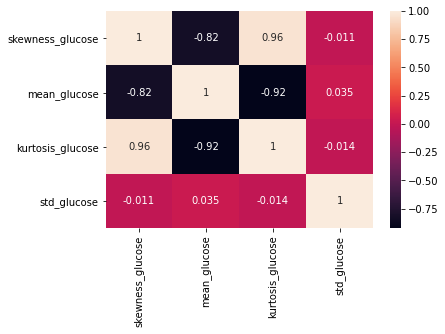

In [107]:
sns.heatmap(train_data_copy.loc[:, ['skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose']].corr(), annot=True)

Vidíme, že mean_glucose má pomerne silnú koreláciu so skewness_glucose a s kurtosis_glucose. Kurtosis_glucose má zasa silnú koreláciu so skewness_glucose.

### Artibút skewness_glucose

In [108]:
train_data_copy[train_data_copy['skewness_glucose'].isnull()]

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2929,Raymond Diaz,38,Female,1981-07-07,White,Separated,Sales,0.0,6.0,Unmarried,NaN,121.257812,0.0,0.010873,10th,405177.0,0.0,53.571396,<=50K,United-States,40.0,0.0,Private,2.040134,12.948253,11.198396,167.728186


Prázdna hodnota tohto atribútu je len v jednom zázname.

In [109]:
class SkewnessGlucoseImputer(TransformerMixin):
    def __init__(self):
        self.model = LinearRegression()
        self.parameters = ['kurtosis_glucose']
        
    def _get_mask(self, _X):
        return np.isnan(_X.skewness_glucose)        
    
    def fit(self, _X):
        mask = self._get_mask(_X)
        self.model.fit(X = _X.loc[~mask, self.parameters], y = _X[~mask].skewness_glucose)
    
        return self
    
    def transform(self, _X):
        mask = self._get_mask(_X)
        _X.loc[mask, 'skewness_glucose'] = self.model.predict(_X.loc[mask, self.parameters])

        return _X

In [110]:
imp_skewness_glu = SkewnessGlucoseImputer()
train_data_copy = imp_skewness_glu.fit_transform(train_data_copy)

              name  age     sex date_of_birth   race marital_status  \
2929  Raymond Diaz   38  Female    1981-07-07  White      Separated   

     occupation  pregnant  education_num relationship  skewness_glucose  \
2929      Sales       0.0            6.0    Unmarried               NaN   

      mean_glucose  capital_gain  kurtosis_glucose education    fnlwgt  \
2929    121.257812           0.0          0.010873      10th  405177.0   

      diabetes  std_glucose income native_country  hours_per_week  \
2929       0.0    53.571396  <=50K  United-States            40.0   

      capital_loss workclass  mean_oxygen  std_oxygen  kurtosis_oxygen  \
2929           0.0   Private     2.040134   12.948253        11.198396   

      skewness_oxygen  
2929       167.728186  


Meno pacienta, ktorému chýbal záznam o tomto atribúte bol Raymond Diaz. Pozrieme si teda jeho záznam po priradení hodnoty.

In [111]:
train_data_copy[train_data_copy['name'] == 'Raymond Diaz']

,name,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2929,Raymond Diaz,38,Female,1981-07-07,White,Separated,Sales,0.0,6.0,Unmarried,-1.217227,121.257812,0.0,0.010873,10th,405177.0,0.0,53.571396,<=50K,United-States,40.0,0.0,Private,2.040134,12.948253,11.198396,167.728186


Vidíme, že v zázname sa teraz nachádza v stĺpci skewness_glucose hodnota -1.217227. Na základe pozorovania hodnôt, si myslíme, že daná hodnota ,,sedí", vzhľadom na koreláciu, ktorú má skewness_glucose s kurtosis_glucose. 

### Atribút mean_glucose

Rovnako ako v predchádzajúcich prípadoch si pozrieme záznamy s chýbajúcimi hodnotami tohto atribútu.

In [ ]:
train_data_copy[train_data_copy['mean_glucose'].isnull()]

Vidíme, že záznamov je až 737.

V predchádzajúcom prípade sme doplnili hodnotu pomocou priemeru. Teraz, keď je chýbajúcich hodnôt pomerne veľa, by dáta boli skreslené. Môžeme použiť KNN inputation, kedy by sa hodnoty doplnili ako priemer najbližších susedov.

Predtým ale skontrolujme, či hodnoty tohto atribútu nie sú závislé na iných atribútoch

In [ ]:
train_data_copy['diabetes'].corr(train_data_copy['mean_glucose'])

In [ ]:
train_data_copy['std_glucose'].corr(train_data_copy['mean_glucose'])

In [ ]:
train_data_copy['skewness_glucose'].corr(train_data_copy['mean_glucose'])

In [ ]:
train_data_copy['kurtosis_glucose'].corr(train_data_copy['mean_glucose'])

Vidíme, že atribút "mean_glucose" je v podstatnej miere závislý na atribúte "kurtosis_glucose". Aby sme nestratili tieto závislosti, je vhodné doplniť chýbajúce hodnoty stĺpca "mean_glucose" metódou lineárna regresia.

In [ ]:
#TODO - linearna regresia

### Atribút fnlwgt

Ide o numerický atribút, ktorý nekoreluje so žiadnym iným atribútom. Trénovacia sada neobsahuje prázdne hodnoty tohto atribútu, avšak ak by sa vyskytli v testovacej, nahradili by sme ich priemerom.

### Overenie

In [ ]:
train_data_copy.isnull().sum()

In [ ]:
train_data.isnull().sum()

## Pipeline

V poli "categoric_columns_most_frequent" sa nachádzajú názvy všetkých stĺpcov, ktoré obsahujú kategorické hodnoty. Chýbajúce hodnoty v jednotlivých stĺpcoch nahradíme najčastejšie sa vyskytujúcimi hodnotami v daných stĺpcoch. Použijeme na to SimpleInputer z knižnice Scikit learn.

V poli "numeric_columns_mean" sú uložené stĺpce číselných hodnôt. Chýbajúce hodnoty týchto atribútov nahradíme priemerom ostatných hodnôt daného atribútu.

In [ ]:
train_data.corr()

In [ ]:
#atributy, v ktorych ideme nahradzat chybajuce hodnoty
categoric_columns_most_frequent = ['sex', 'race', 'marital_status', 'occupation', 'pregnant', 'education_num', 'relationship', 'education', 'native_country', 'income', 'hours_per_week', 'workclass']
numeric_columns_mean = ['fnlwgt', 'capital_gain', 'capital_loss']
relationships_linear_regresion = [
    ['skewness_glucose', 'kurtosis_glucose'],
    ['mean_glucose', 'kurtosis_glucose'],
    ['skewness_oxygen', 'kurtosis_oxygen']
]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categoric_columns_most_frequent),
        ('num', numeric_transformer, numeric_columns_mean)
    ]
)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

Keďže sa teraz jedná o trénovaciu množinu dát, zavoláme metódy fit aj transform. Keďže sa transformácia trénujete iba na trénovacích dátach, na množine testovacích dát už budeme volať len funkciu transform. 

In [ ]:
train_data[categoric_columns_most_frequent + numeric_columns_mean] = clf.fit_transform(train_data)

## Overenie

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.info()

## Detekcia a nahradenie vychýlených hodnôt

In [ ]:
sns.boxplot(x=train_data['skewness_glucose'])

In [ ]:
train_data['skewness_glucose'].max()

In [ ]:
train_data['skewness_glucose'].value_counts().max()

In [ ]:
sns.boxplot(x=train_data['fnlwgt'])

In [ ]:
train_data['fnlwgt'].max()

In [ ]:
train_data['fnlwgt'].value_counts().max()

Na detekovanie zvyšných outlierov použijeme Interquartile Range Method (IRQ). Hodnoty pod našou spodnou hranicou nahradíme hodnotou 5. percentilu a hodnoty nad hornou hranicou nahradíme 95. percentilom. Vytvoríme si na to vlastnú triedu.

In [ ]:
class Outliers():
    
    def __init__(self, atributes):
        self.atributes = atributes
        
    def fit(self, df, y = None):
        return self
    
    def transform(self, df, y = None):
        for atr in self.atributes:
            self.detect_outliers(atr, df)
        return df
        
    def detect_outliers(self, atr, df):
        print(atr)
        Q1 = np.percentile(df[atr], 25, interpolation = 'midpoint')  
        Q3 = np.percentile(df[atr], 75, interpolation = 'midpoint')  

        print('Q1', Q1)
        print('Q3', Q3)

        IQR = Q3 - Q1
        below = Q1-1.5*IQR
        above = Q3+1.5*IQR
        
        Q5 = np.percentile(df[atr], 5, interpolation = 'midpoint')  
        Q95 = np.percentile(df[atr], 95, interpolation = 'midpoint')
        
        df[atr].loc[df[atr] < below] = Q5
        df[atr].loc[df[atr] > above] = Q95

        return df

Do poľa outliers si uložíme všetky atribúty, ktorých vychýlené hodnoty chceme upravovať. S využitím pipeline sputíme našu vytvorenú triedu a nahradíme nechcené hodnoty.

In [ ]:
outliers = ['skewness_glucose', 'fnlwgt','age', 'capital_gain', 'capital_loss', 'mean_glucose', 'std_glucose', 'kurtosis_glucose','mean_oxygen', 'std_oxygen', 'skewness_oxygen', 'kurtosis_oxygen']

pipelines = Pipeline( steps = [
    ('outliers', Outliers(outliers))
])

train_data = pipelines.fit_transform(train_data)

In [ ]:
sns.boxplot(x=train_data['skewness_glucose'])

In [ ]:
train_data['skewness_glucose'].max()

In [ ]:
train_data['skewness_glucose'].value_counts().max()

In [ ]:
sns.boxplot(x=train_data['fnlwgt'])

In [ ]:
train_data['fnlwgt'].max()

In [ ]:
train_data['fnlwgt'].value_counts().max()

In [ ]:
sns.boxplot(x=train_data['age'])

In [ ]:
train_data

## Prevedenie kategorických hodnôt na číselné

In [ ]:
import category_encoders as ce

In [ ]:
categorical_string_columns = ['sex', 'race', 'marital_status', 'occupation', 'relationship', 'native_country', 'income', 'workclass']

clf = Pipeline(steps=[('binaryencoder', ce.BinaryEncoder(cols=categorical_string_columns))])

In [ ]:
train_data = clf.fit_transform(train_data)

In [ ]:
train_data